<a href="https://colab.research.google.com/github/ShivamV01/Exploratory-Data-Analaysis-in-Python/blob/main/Project_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

# Load and Inspect data

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset (I upload dataset on Github and get link)
data_path = "https://raw.githubusercontent.com/ShivamV01/Exploratory-Data-Analaysis-in-Python/main/Superstore%20Marketing%20Data%20-%20Sheet1.csv"
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


# Data Cleaning and Preprocessing

In [6]:
data.info()
# observation -> here, total 2240 samples and 22 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Fill missing values in 'Income' with the median income
data['Income'] = data['Income'].fillna(data['Income'].median())

In [8]:
# Ensuring Consistent Data Types
# We'll ensure that each column has the correct data type.
# Checking data types
data.dtypes

# Converting columns to appropriate data types
data['Year_Birth'] = data['Year_Birth'].astype(int)
data['Income'] = data['Income'].astype(float)
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], errors='coerce')

data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,NaT,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,NaT,0,6,...,11,0,34,2,3,1,2,7,1,0


In [9]:
# Replace invalid dates in 'Dt_Customer' with 2012-07-30 which is oldest date in dataset
data['Dt_Customer'] = data['Dt_Customer'].fillna(pd.to_datetime('2012-07-30'))

# Fill in other missing values if necessary
# Assuming numerical columns with missing values can be filled with the mean
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mean())
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2012-07-30,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2012-07-30,0,6,...,11,0,34,2,3,1,2,7,1,0


## Summary of Basic Statistics

In [10]:
# Descriptive statistics
summary_stats = data.describe().transpose()
summary_stats

,count,mean,min,25%,50%,75%,max,std
Id,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2240.0,52237.975446,1730.0,35538.75,51381.5,68289.75,666666.0,25037.955891
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-02-24 11:04:04.285714432,2012-07-30 00:00:00,2012-07-30 00:00:00,2012-11-18 12:00:00,2013-09-16 00:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


## Distribution Analysis
We'll analyze the distribution of customer demographics such as age, education, and marital status using visualizations.

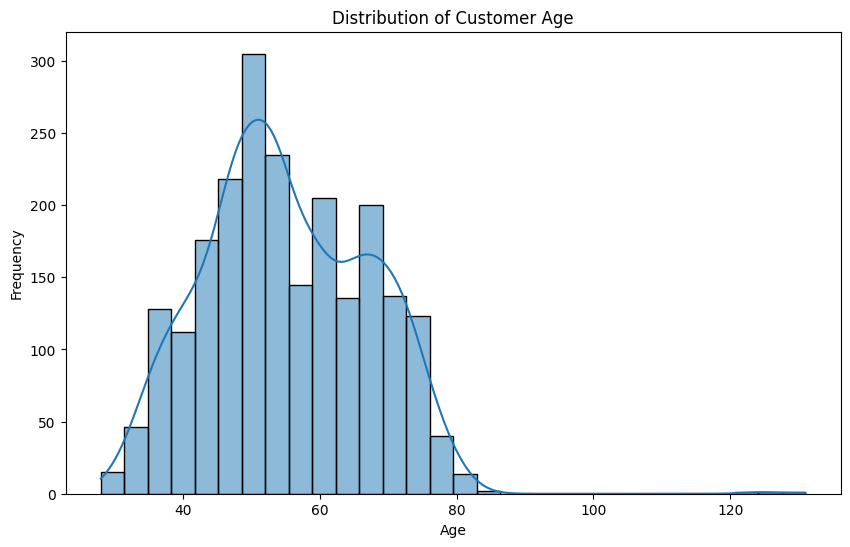

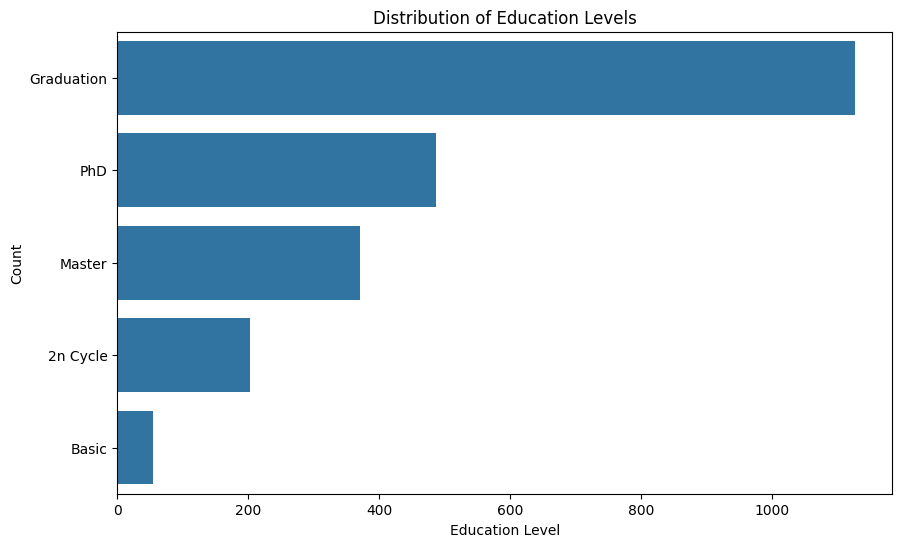

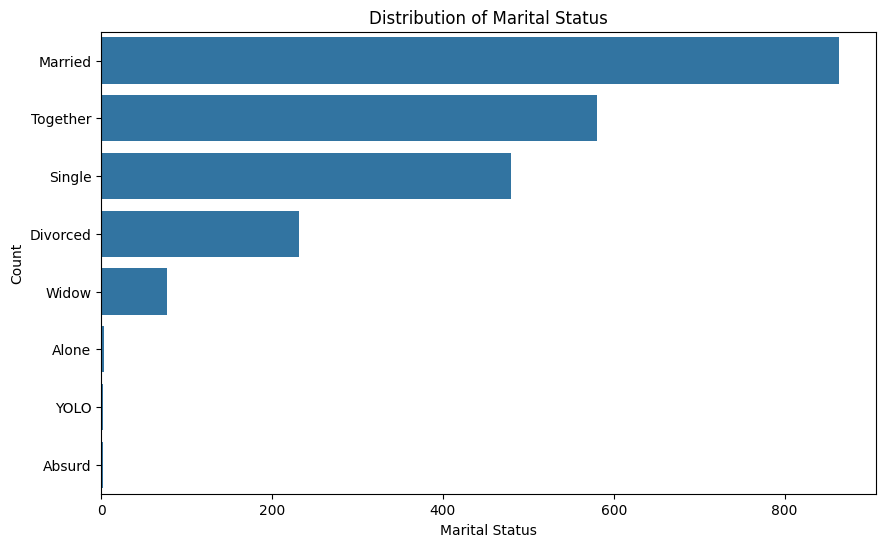

In [11]:
# Age calculation from Year_Birth
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Education
plt.figure(figsize=(10, 6))
sns.countplot(data['Education'], order=data['Education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# Distribution of Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(data['Marital_Status'], order=data['Marital_Status'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [12]:
# Calculate Age based on Year_Birth
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Key variables
key_vars = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate descriptive statistics
descriptive_stats = data[key_vars].describe().T
descriptive_stats['mean'] = data[key_vars].mean()
descriptive_stats['median'] = data[key_vars].median()
descriptive_stats['mode'] = data[key_vars].mode().iloc[0]
descriptive_stats['variance'] = data[key_vars].var()
descriptive_stats['std_dev'] = data[key_vars].std()

descriptive_stats


,count,mean,std,min,25%,50%,75%,max,median,mode,variance,std_dev
Age,2240.0,55.194196,11.984069,28.0,47.00,54.0,65.00,131.0,54.0,48.0,1.436179e+02,11.984069
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0,51381.5,51381.5,6.268992e+08,25037.955891
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,173.5,2.0,1.132978e+05,336.597393
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,8.0,0.0,1.581926e+03,39.773434
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,67.0,7.0,5.094743e+04,225.715373
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,12.0,0.0,2.984325e+03,54.628979
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0,8.0,0.0,1.704080e+03,41.280498
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0,24.0,1.0,2.721442e+03,52.167439


In [13]:
# Identify outliers using the IQR method
Q1 = data[key_vars].quantile(0.25)
Q3 = data[key_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[key_vars] < (Q1 - 1.5 * IQR)) | (data[key_vars] > (Q3 + 1.5 * IQR)))
outliers.sum()

,0
Age,3
Income,8
MntWines,35
MntFruits,227
MntMeatProducts,175
MntFishProducts,223
MntSweetProducts,248
MntGoldProds,207


In [14]:
# Load the data
data = pd.read_csv("https://raw.githubusercontent.com/Alikhan6642/datasets/main/Superstore_Marketing_Data.csv")

# Calculate Age based on Year_Birth
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Key variables
key_vars = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate descriptive statistics
descriptive_stats = data[key_vars].describe().T
descriptive_stats['mean'] = data[key_vars].mean()
descriptive_stats['median'] = data[key_vars].median()
descriptive_stats['mode'] = data[key_vars].mode().iloc[0]
descriptive_stats['variance'] = data[key_vars].var()
descriptive_stats['std_dev'] = data[key_vars].std()

# Identify outliers using the IQR method
Q1 = data[key_vars].quantile(0.25)
Q3 = data[key_vars].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[key_vars] < (Q1 - 1.5 * IQR)) | (data[key_vars] > (Q3 + 1.5 * IQR)))

descriptive_stats, outliers.sum()


(                   count          mean           std     min       25%  \
 Age               2240.0     55.194196     11.984069    28.0     47.00   
 Income            2216.0  52247.251354  25173.076661  1730.0  35303.00   
 MntWines          2240.0    303.935714    336.597393     0.0     23.75   
 MntFruits         2240.0     26.302232     39.773434     0.0      1.00   
 MntMeatProducts   2240.0    166.950000    225.715373     0.0     16.00   
 MntFishProducts   2240.0     37.525446     54.628979     0.0      3.00   
 MntSweetProducts  2240.0     27.062946     41.280498     0.0      1.00   
 MntGoldProds      2240.0     44.021875     52.167439     0.0      9.00   
 
                       50%       75%       max   median    mode      variance  \
 Age                  54.0     65.00     131.0     54.0    48.0  1.436179e+02   
 Income            51381.5  68522.00  666666.0  51381.5  7500.0  6.336838e+08   
 MntWines            173.5    504.25    1493.0    173.5     2.0  1.132978e+05   

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



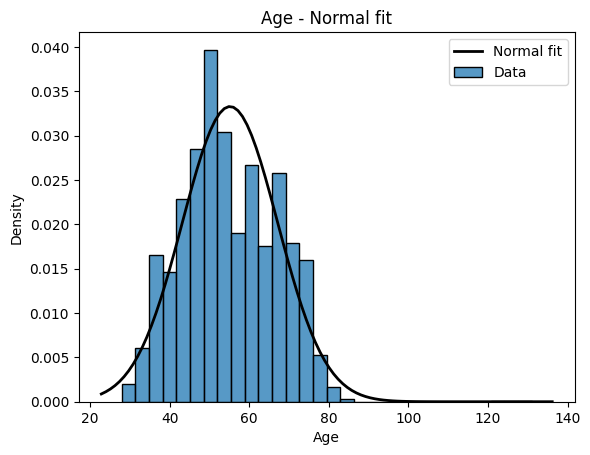

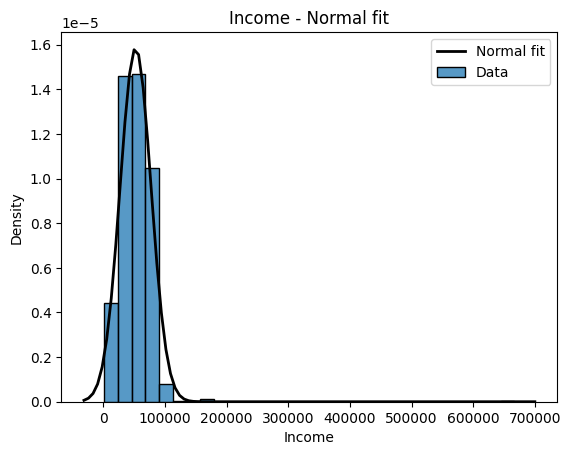

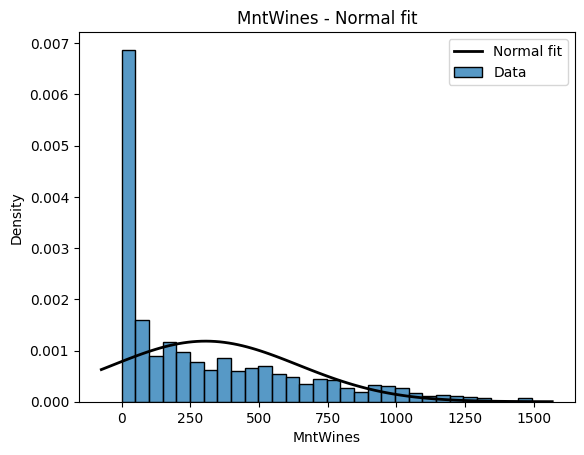

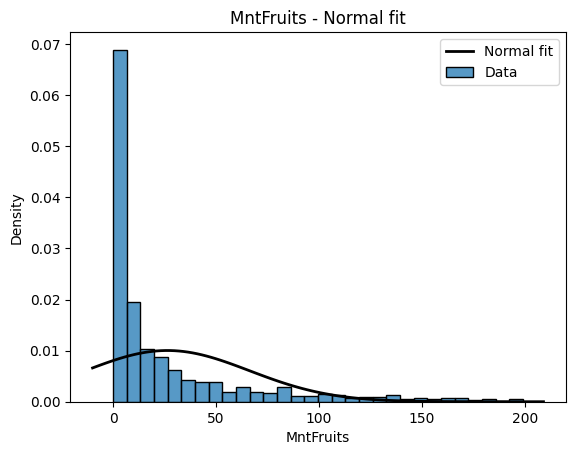

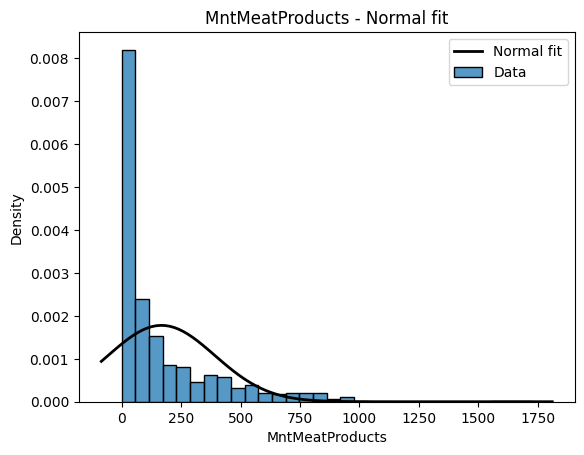

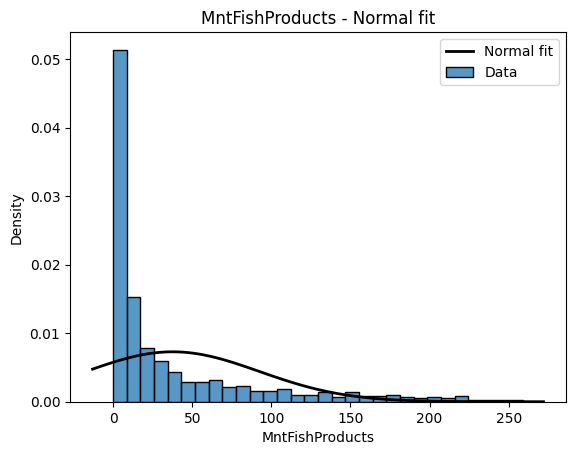

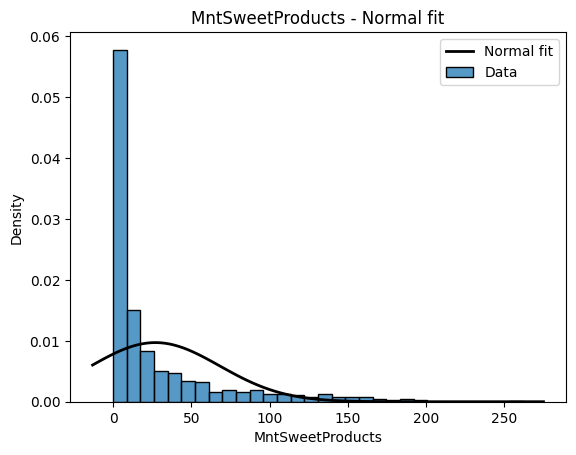

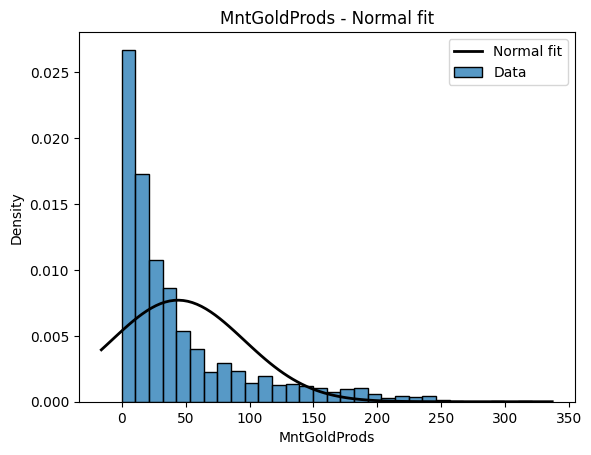

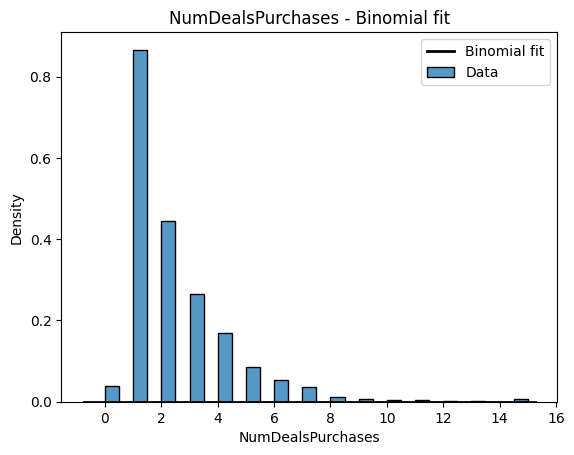

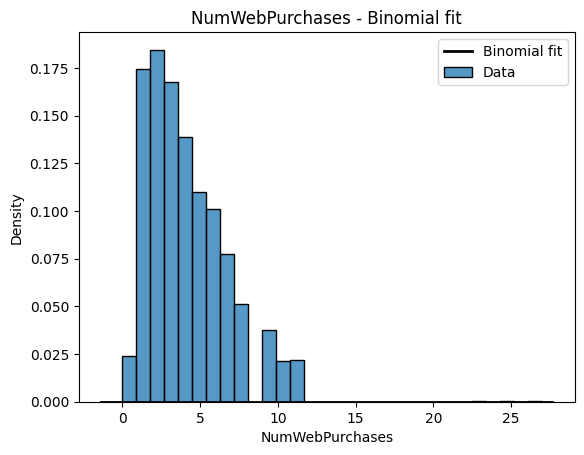

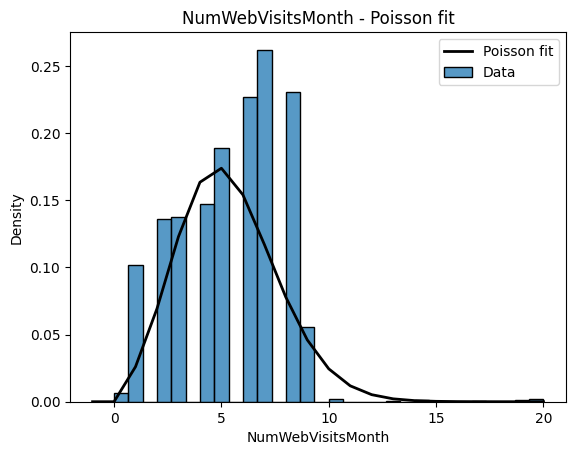

In [15]:
# Calculate Age based on Year_Birth
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Check for non-finite values in the Income column
non_finite_values = data['Income'][~np.isfinite(data['Income'])]

# Remove non-finite values
data = data[np.isfinite(data['Income'])]

# Key variables
key_vars = ['Age', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']

# Fit and plot distributions
def plot_distribution(variable, dist_name, dist, params, is_discrete=False):
    sns.histplot(data[variable], kde=False, stat="density", bins=30, label='Data')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    if is_discrete:
        x = np.arange(xmin, xmax)
        p = dist.pmf(x, *params)
    else:
        p = dist.pdf(x, *params)
    plt.plot(x, p, 'k', linewidth=2, label=f'{dist_name} fit')
    title = f'{variable} - {dist_name} fit'
    plt.title(title)
    plt.legend()
    plt.show()

# Age - Normal Distribution
age_mean, age_std = stats.norm.fit(data['Age'])
plot_distribution('Age', 'Normal', stats.norm, (age_mean, age_std))

# Income - Normal Distribution
income_mean, income_std = stats.norm.fit(data['Income'])
plot_distribution('Income', 'Normal', stats.norm, (income_mean, income_std))

# MntWines - Normal Distribution
mnt_wines_mean, mnt_wines_std = stats.norm.fit(data['MntWines'])
plot_distribution('MntWines', 'Normal', stats.norm, (mnt_wines_mean, mnt_wines_std))

# MntFruits - Normal Distribution
mnt_fruits_mean, mnt_fruits_std = stats.norm.fit(data['MntFruits'])
plot_distribution('MntFruits', 'Normal', stats.norm, (mnt_fruits_mean, mnt_fruits_std))

# MntMeatProducts - Normal Distribution
mnt_meat_mean, mnt_meat_std = stats.norm.fit(data['MntMeatProducts'])
plot_distribution('MntMeatProducts', 'Normal', stats.norm, (mnt_meat_mean, mnt_meat_std))

# MntFishProducts - Normal Distribution
mnt_fish_mean, mnt_fish_std = stats.norm.fit(data['MntFishProducts'])
plot_distribution('MntFishProducts', 'Normal', stats.norm, (mnt_fish_mean, mnt_fish_std))

# MntSweetProducts - Normal Distribution
mnt_sweet_mean, mnt_sweet_std = stats.norm.fit(data['MntSweetProducts'])
plot_distribution('MntSweetProducts', 'Normal', stats.norm, (mnt_sweet_mean, mnt_sweet_std))

# MntGoldProds - Normal Distribution
mnt_gold_mean, mnt_gold_std = stats.norm.fit(data['MntGoldProds'])
plot_distribution('MntGoldProds', 'Normal', stats.norm, (mnt_gold_mean, mnt_gold_std))

# NumDealsPurchases - Binomial Distribution
num_deals_mean = data['NumDealsPurchases'].mean()
n = 10  # Assume maximum number of deals is 10
p = num_deals_mean / n
plot_distribution('NumDealsPurchases', 'Binomial', stats.binom, (n, p), is_discrete=True)

# NumWebPurchases - Binomial Distribution
num_web_purchases_mean = data['NumWebPurchases'].mean()
n = 10  # Assume maximum number of web purchases is 10
p = num_web_purchases_mean / n
plot_distribution('NumWebPurchases', 'Binomial', stats.binom, (n, p), is_discrete=True)

# NumWebVisitsMonth - Poisson Distribution
num_web_visits_mean = data['NumWebVisitsMonth'].mean()
plot_distribution('NumWebVisitsMonth', 'Poisson', stats.poisson, (num_web_visits_mean,), is_discrete=True)


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

## Step 1: Correlation Analysis


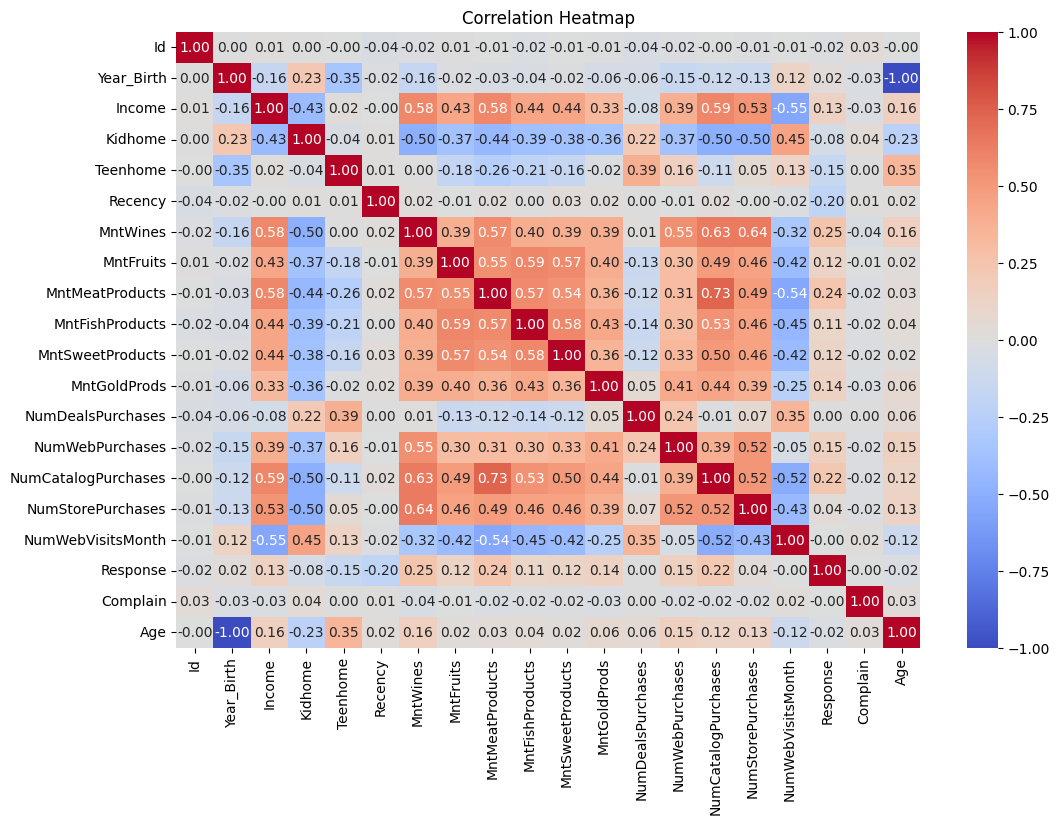

In [16]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


## Step 2: Spending Habits Analysis

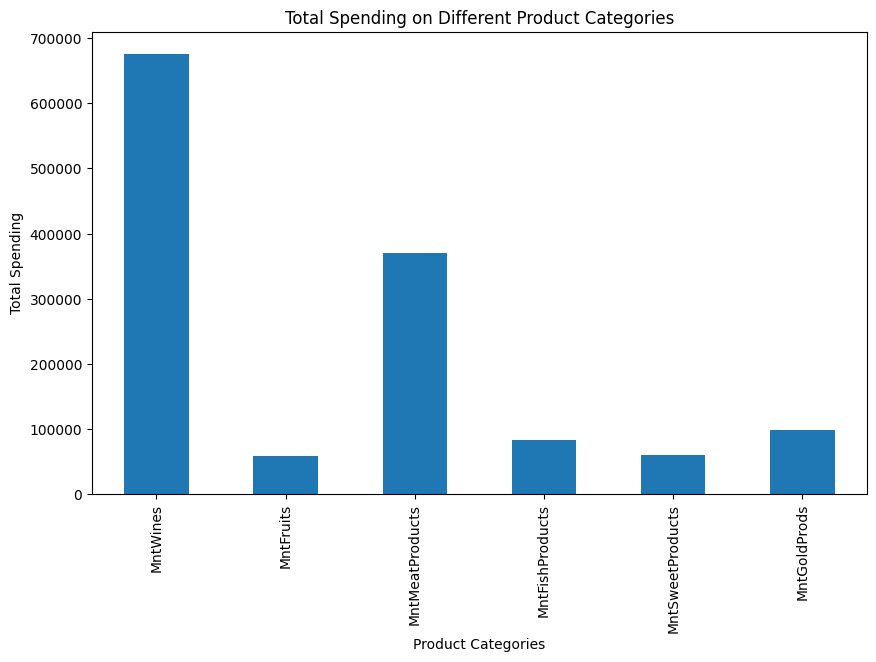

In [17]:
# Spending habits on different product categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data[spending_columns].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending on Different Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.show()


## Step 3: Segment Customers

In [18]:
# Segment by income
income_segments = pd.qcut(data['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
data['Income_Segment'] = income_segments

# Analyze spending habits by income segment
income_spending = data.groupby('Income_Segment')[spending_columns].mean()
print(income_spending)

# Segment by marital status
marital_status_spending = data.groupby('Marital_Status')[spending_columns].mean()
print(marital_status_spending)


                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Income_Segment                                                            
Low              21.550542   5.935018        22.666065         8.666065   
Medium          124.823105   8.028881        48.238267        13.586643   
High            439.234657  30.666065       161.090253        39.563177   
Very High       634.758123  60.794224       435.989170        88.734657   

                MntSweetProducts  MntGoldProds  
Income_Segment                                  
Low                     5.924188     16.850181  
Medium                  8.548736     28.090253  
High                   28.566787     58.620939  
Very High              65.075812     72.299639  
                  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Marital_Status                                                            
Absurd          355.500000  84.500000       312.500000       205.500000   
Alone           184.666667   4

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

##  Age and Spending Habits

**Insight**:
Younger age groups (30-40) have higher spending on various products.

**Recommendation**:
Focus marketing campaigns on younger age groups with promotions tailored to their interests and spending habits.

## Income and Spending Habits

**Insight**:
Higher income segments show significantly higher spending across all product categories, particularly luxury items.

**Recommendation**:
Implement tiered pricing strategies and exclusive offers for high-income customers to maximize revenue.

## Marital Status and Spending Habits

**Insight**:
Married and 'Together' individuals tend to spend more compared to singles.

**Recommendation**:
Design family-oriented marketing campaigns and bundle offers to attract and retain customers with families.

## Overall Recommendations:
**1. Target Marketing Campaigns:**

* Focus on younger age groups and high-income segments with personalized promotions and exclusive offers.

**2. Premium Product Lines:**
* Develop and market premium products to highly educated and high-income customers.

**3. Family-Oriented Offers:**

* Create family-oriented marketing campaigns and bundle offers to attract married and 'Together' individuals.

**4. Cross-Promotions:**
* Implement cross-promotional strategies for correlated product categories to boost overall sales.

**5. Loyalty Programs:**
* Design loyalty programs that reward high spending across multiple categories to encourage repeat purchases.


By leveraging these insights and recommendations, the company can enhance its marketing strategies and drive increased customer engagement and revenue.



## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍